In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 1. Apply Averaging filter of image eye2_1 with 
## Uniform weights: [1 1 1; 1 1 1; 1 1 1]* (1/9) and
## nonuniform weights: [1 2 1; 2 4 2; 1 2 1]* (1/16) 

Text(0.5, 1.0, 'original image')

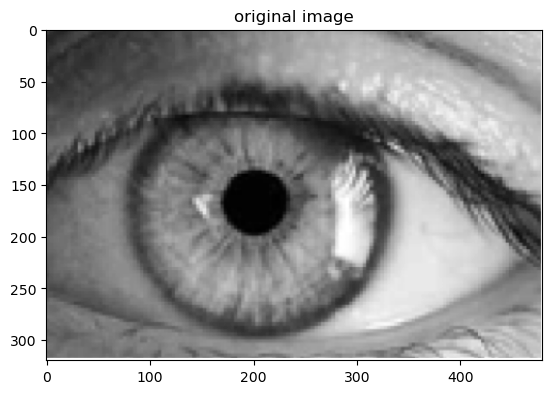

In [2]:
img=cv2.imread('eye2_1.png',0)
img=cv2.resize(img,[480,320])
plt.imshow(img, 'gray')
plt.title('original image')

### Uniform weights

In [3]:
# generate a mask
mask1=np.ones((3,3),np.float32)*(1/9)
mask1

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

Text(0.5, 1.0, 'Uniform filtered / averaged image')

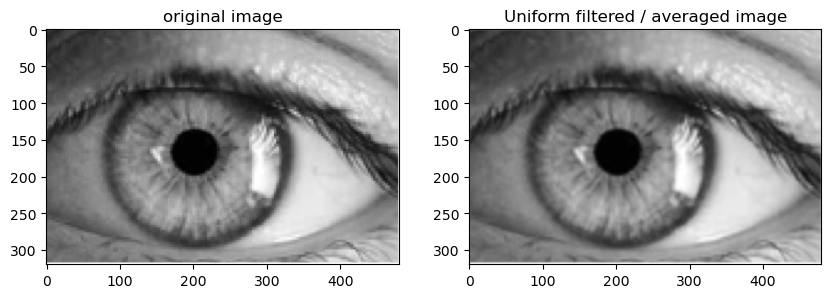

In [4]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('original image')
plt.subplot(122)
ave_img=cv2.filter2D(img, -1, mask1) # -1 will give the output image depth as same as the input image
plt.imshow(ave_img,'gray')
plt.title('Uniform filtered / averaged image')

### nonuniform weights: [1 2 1; 2 4 2; 1 2 1]* (1/16) 

In [5]:
# generate mask
mask2=np.array([[1,2,1],[2,4,2],[1,2,1]],np.float32)*(1/16)
mask2

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]], dtype=float32)

Text(0.5, 1.0, 'Non - uniform filtered / averaged image')

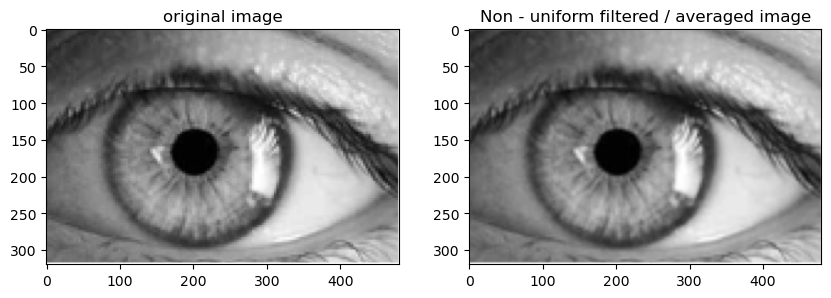

In [6]:
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('original image')
plt.subplot(122)
ave_non_img=cv2.filter2D(img, -1, mask2) # -1 will give the output image depth as same as the input image
plt.imshow(ave_non_img,'gray')
plt.title('Non - uniform filtered / averaged image')

# 2. Show the Gaussian function

In [7]:
N=3.0

u=np.linspace(-N , N)
v=u
X, Y = np.meshgrid(u,v) # generate all combination of X,Y (like a grid)
Z = (1/(2*np.pi))*np.exp(-(X**2+Y**2)/(2)) # the sigma is 1


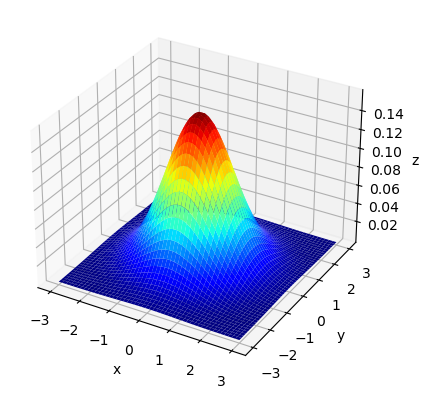

In [8]:
from matplotlib import cm # add the color for the contour plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap=cm.jet)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

* Ref:   
https://stackoverflow.com/questions/52653734/how-to-do-a-3d-plot-of-gaussian-using-numpy
https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

# 3. Apply Gaussian image filtering of image eye2_1 

In [9]:
def Gaussian_mask(size, sigma):
    N=3
    u=np.linspace(-N , N , size, np.float32)
    v=u
    X, Y = np.meshgrid(u,v) 
    Z = (1/(2*np.pi*sigma**2))*np.exp(-(X**2+Y**2)/(2*sigma**2))
    return Z/ np.sum(Z) # rescale the kernal, the sum of kernel should be 1

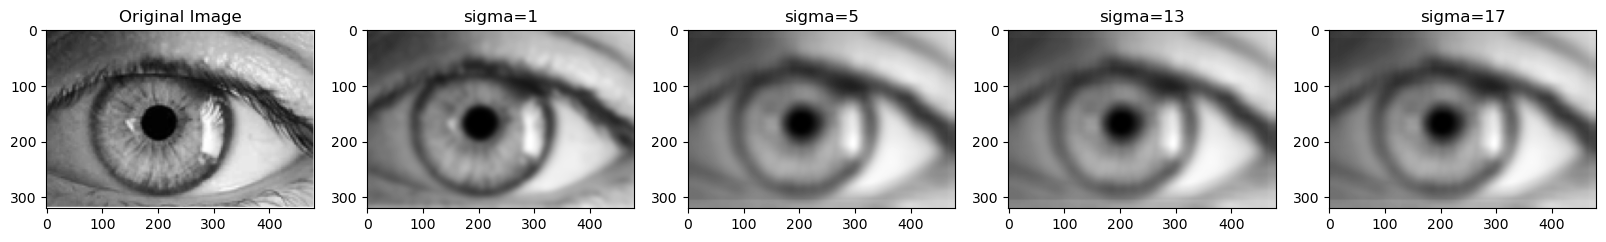

In [10]:
img=cv2.imread('eye2_1.png',0)
img=cv2.resize(img,[480,320])

plt.figure(figsize=(20,8))
plt.subplot(1,5,1)
plt.imshow(img,'gray')
plt.title('Original Image')
ind=2
for s in [1,5,13,17]:
    plt.subplot(1,5,ind)
    mask=Gaussian_mask(30, s)
    res=cv2.filter2D(img, -1, mask)
    plt.imshow(res,'gray')
    plt.title(f'sigma={s}')
    ind+=1

* Ref:  
https://www.kaggle.com/code/dasmehdixtr/gaussian-filter-implementation-from-scratch

# 4. Apply Unsharp mask of image eye2_1 

In [11]:
img=cv2.imread('eye2_1.png',0)
img=cv2.resize(img,[480,320])

Text(0.5, 1.0, 'Sharpened Image: Gaussain Blur')

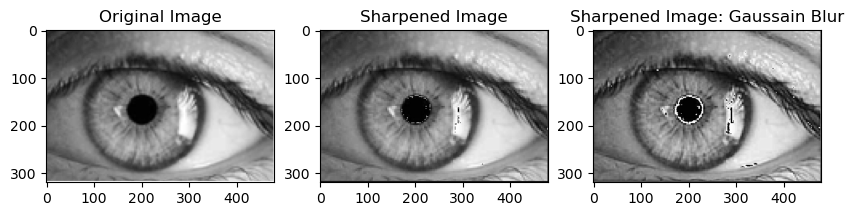

In [12]:
plt.figure(figsize=(10,8))
plt.subplot(131)
plt.imshow(img,'gray')
plt.title('Original Image')

# Blurred image with Uniform weights / Average
# Shape image = Original image + (Original image - Blurred image*) 
plt.subplot(132)
mask1=np.ones((3,3),np.float32)/9
ave=cv2.filter2D(img, -1, mask1)
sharp=img+(img-ave) 
plt.imshow(sharp, 'gray')
plt.title('Sharpened Image')

# Second method for blurring
plt.subplot(133)
mask2=Gaussian_mask(9, 5)
gave=cv2.filter2D(img, -1, mask2)
#gave=cv2.GaussianBlur(img,(9,9),5,5)
sharp_2=img+(img-gave) 
plt.imshow(sharp_2, 'gray')
plt.title('Sharpened Image: Gaussain Blur')

# 5. Remove noise of noise_bridge image using
## Gaussain filter
## Uniform filter
## Median filter

Text(0.5, 1.0, 'Median filtered Image')

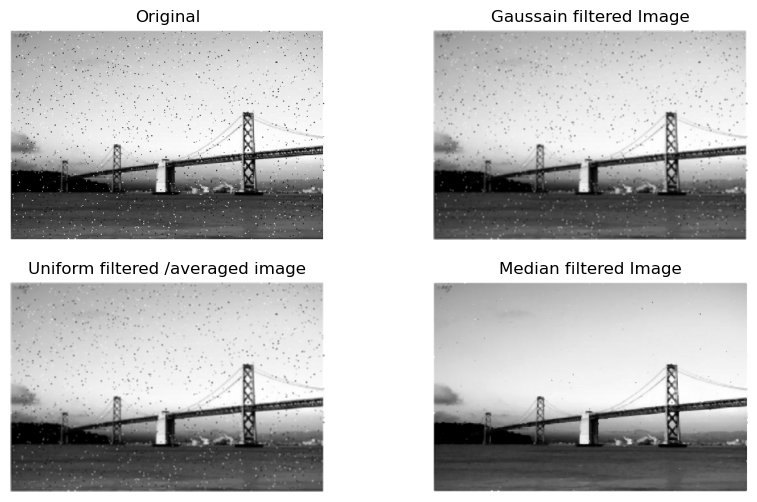

In [13]:
img=cv2.imread('noise_bridge.png',0)
img=cv2.resize(img,[480,320])

plt.figure(figsize=(10,6))
plt.subplot(221)
plt.imshow(img, 'gray')
plt.axis('off')
plt.title('Original')

# Gaussain filter
gimg=cv2.GaussianBlur(img,(3,3),1,1)
plt.subplot(222)
plt.imshow(gimg, 'gray')
plt.axis('off')
plt.title('Gaussain filtered Image')

# Uniform weights
mask2=np.ones((3,3),np.float32)/9
ave_img=cv2.filter2D(img, -1, mask2)
plt.subplot(223)
plt.imshow(gimg, 'gray')
plt.axis('off')
plt.title('Uniform filtered /averaged image')

# Median Filtering
medimg=cv2.medianBlur(img, 3) 
plt.subplot(224)
plt.imshow(medimg, 'gray')
plt.axis('off')
plt.title('Median filtered Image')

* Ref:  
https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9